<a href="https://colab.research.google.com/github/ybxfatfat/hello_world/blob/master/Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

hs_300 = pd.read_csv('RESSET_IDXDRET_daily.csv')
hs_300

,指数名称_IdxNm,交易日期_TrdDt,收盘价_ClPr,涨跌幅_ChgPct,指数日收益率_IdxDRet,Unnamed: 5
0,沪深300,2013-01-04,2524.41,0.057750,0.0006,NaN
1,沪深300,2013-01-07,2535.99,0.458563,0.0046,NaN
2,沪深300,2013-01-08,2525.33,-0.420152,-0.0042,NaN
3,沪深300,2013-01-09,2526.13,0.031521,0.0003,NaN
4,沪深300,2013-01-10,2530.57,0.175882,0.0018,NaN
...,...,...,...,...,...,...
2667,沪深300,2023-12-25,3347.45,0.306323,0.0031,NaN
2668,沪深300,2023-12-26,3324.79,-0.676951,-0.0068,NaN
2669,沪深300,2023-12-27,3336.36,0.347902,0.0035,NaN
2670,沪深300,2023-12-28,3414.54,2.343367,0.0234,NaN


C:\Users\dell\AppData\Local\Temp/ipykernel_3748/2118125737.py:27: RuntimeWarning: invalid value encountered in double_scalars
  variance = (sigma ** 2) * (1 - np.exp(-2 * theta * dt)) / (2 * theta)


Estimated parameters: theta = 0.1, mu = 3836.1356198347103, sigma = 229.02297408447936


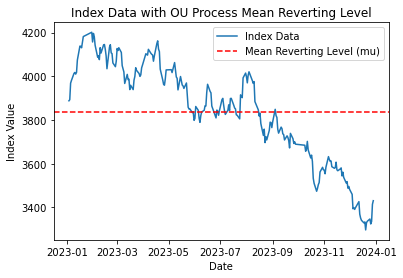

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
hs_300['Date'] = pd.to_datetime(hs_300['交易日期_TrdDt'])

# Load index data from CSV
period = hs_300[(hs_300['Date'] >= start_date) & (hs_300['Date'] <= end_date)]
index_data = period['收盘价_ClPr'].values

# Define the log-likelihood function for the OU process
def ou_log_likelihood(params, data, dt):
    theta, mu, sigma = params

    n = len(data)
    log_likelihood = 0

    for i in range(1, n):
        x_prev = data[i-1]
        x_curr = data[i]

        # Mean and variance of the conditional distribution
        mean = x_prev * np.exp(-theta * dt) + mu * (1 - np.exp(-theta * dt))
        variance = (sigma ** 2) * (1 - np.exp(-2 * theta * dt)) / (2 * theta)

        # Log-likelihood contribution of the i-th observation
        log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((x_curr - mean) ** 2) / (2 * variance)

    return -log_likelihood  # Negative log-likelihood for minimization

# Time step (in days)
dt = 1/period.shape[0]  # Assuming daily data

# Initial parameter guesses
initial_guess = [0.1, np.mean(index_data), np.std(index_data)]

# Perform MLE
result = minimize(ou_log_likelihood, initial_guess, args=(index_data, dt), method='L-BFGS-B', bounds=[(0, None), (None, None), (0, None)])

theta_est, mu_est, sigma_est = result.x
print(f"Estimated parameters: theta = {theta_est}, mu = {mu_est}, sigma = {sigma_est}")

# Plot the original index data and the mean-reverting level
plt.plot(period['Date'], index_data, label='Index Data')
plt.axhline(y=mu_est, color='r', linestyle='--', label='Mean Reverting Level (mu)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Index Data with OU Process Mean Reverting Level')
plt.legend()
plt.show()


242

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    计算欧式期权价格的Black-Scholes公式

    参数:
    S : float : 当前股票价格
    K : float : 期权行权价格
    T : float : 期权到期时间（以年为单位）
    r : float : 无风险利率
    sigma : float : 标的资产价格的波动率
    option_type : str : 'call' 表示看涨期权，'put' 表示看跌期权

    返回:
    float : 期权价格
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type必须是'call'或'put'")

    return price

# 参数设置
S = 100  # 当前标的价格
K = 100  # 期权行权价格
T = 1.0  # 到期时间（以年为单位）
r = 0.05  # 无风险利率
sigma = 0.2  # 波动率

# 计算欧式看涨期权价格
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
print(f"欧式看涨期权价格: {call_price}")

# 计算欧式看跌期权价格
put_price = black_scholes(S, K, T, r, sigma, option_type='put')
print(f"欧式看跌期权价格: {put_price}")


In [ ]:
pd.read_csv('RESSET_FUTSTKIDXTREAQUOT_1.csv')

,证券代码_R_SecuCode,合约名称_ContNm,合约全称_ContFNm,合约类型()_ContType,交易日期_TrdDt,合约代码_ConCd,交易所代码()_ExchCd,合约标的()_ContUdl,合约序列标志()_Flag,前结算价()_PrevSetPr,...,成交量(手)_TrdVol,成交量变化(手)_TrdVolChg,成交量变化幅度(%)_TrdVolChgLim,成交金额(元)_TrdSum,成交金额变化(元)_TrdSumChg,成交金额变化幅度(%)_TrdSumChgLim,主力标志()_MainContMark,基差()_BasVal,更新时间_UpDt,Unnamed: 34
0,20_IF0Y00,沪深300股指期货当月连续,IF当月连续,4,2013-01-04,IF0Y00,20,3145,NaN,2537.4,...,572312.0,-29517.0,-4.9045,4.354999e+11,-2.064213e+10,-4.5254,NaN,8.7910,2023-02-17,NaN
1,20_IF0Y01,沪深300股指期货下月连续,IF下月连续,4,2013-01-04,IF0Y01,20,3145,NaN,2551.2,...,11656.0,2525.0,27.6531,8.923629e+09,1.967364e+09,28.2819,NaN,22.5910,2023-02-17,NaN
2,20_IF0Y02,沪深300股指期货下季连续,IF下季连续,4,2013-01-04,IF0Y02,20,3145,NaN,2565.8,...,20649.0,5523.0,36.5133,1.590745e+10,4.323040e+09,37.3177,NaN,38.1910,2023-02-17,NaN
3,20_IF0Y03,沪深300股指期货隔季连续,IF隔季连续,4,2013-01-04,IF0Y03,20,3145,NaN,2588.2,...,3079.0,154.0,5.2650,2.392472e+09,1.303016e+08,5.7600,NaN,61.7910,2023-02-17,NaN
4,20_IF1303,沪深300股指期货1303,沪深300股指期货1303合约,4,2013-01-04,IF1303,20,3145,3.0,2565.8,...,20649.0,5523.0,36.5133,1.590745e+10,4.323040e+09,37.3177,NaN,38.1910,2023-02-17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,20_IF0Y03,沪深300股指期货隔季连续,IF隔季连续,4,2023-12-29,IF0Y03,20,3145,NaN,3441.2,...,9696.0,-3798.0,-28.1458,1.003434e+10,-3.786981e+09,-27.3996,NaN,21.4901,2023-12-29,NaN
21372,20_IF2403,沪深300股指期货2403,沪深300股指期货2403合约,4,2023-12-29,IF2403,20,3145,3.0,3446.2,...,21829.0,-10731.0,-32.9576,2.261740e+10,-1.075145e+10,-32.2200,NaN,25.2901,2023-12-29,NaN
21373,20_IF2406,沪深300股指期货2406,沪深300股指期货2406合约,4,2023-12-29,IF2406,20,3145,4.0,3441.2,...,9696.0,-3798.0,-28.1458,1.003434e+10,-3.786981e+09,-27.3996,NaN,21.4901,2023-12-29,NaN
21374,20_IF2401,沪深300股指期货2401,沪深300股指期货2401合约,4,2023-12-29,IF2401,20,3145,1.0,3431.0,...,63813.0,-24200.0,-27.4959,6.580790e+10,-2.403348e+10,-26.7510,1.0,8.2901,2023-12-29,NaN
